In [19]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
df = pd.read_csv("Hr_comma_sep.csv")
df.head(5)

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [9]:
df.shape

(14999, 10)

In [11]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [15]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [16]:
corr = df.corr()

/var/folders/jl/n_6k8qzd56lfnys7xqk8d5600000gn/T/ipykernel_72203/658818363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


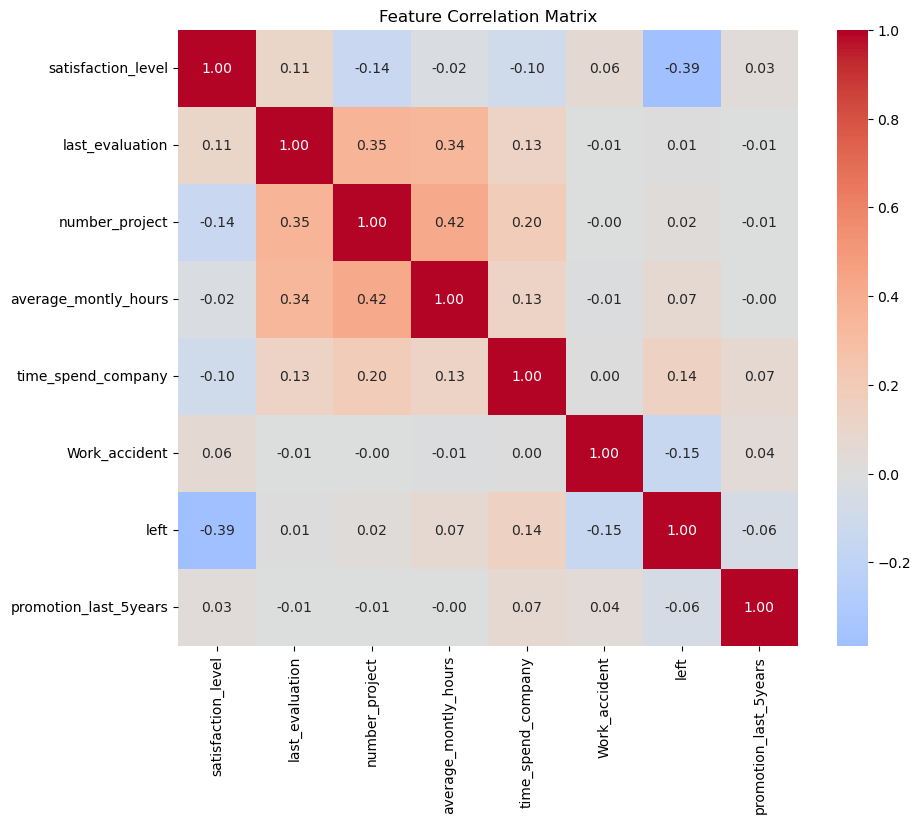

In [20]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix")
plt.show()

In [27]:
df.groupby('left').mean()

/var/folders/jl/n_6k8qzd56lfnys7xqk8d5600000gn/T/ipykernel_72203/588011459.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  retained  
left                                   
0                  0.026251       1.0  
1                  0.005321       0.0

<Axes: xlabel='salary'>

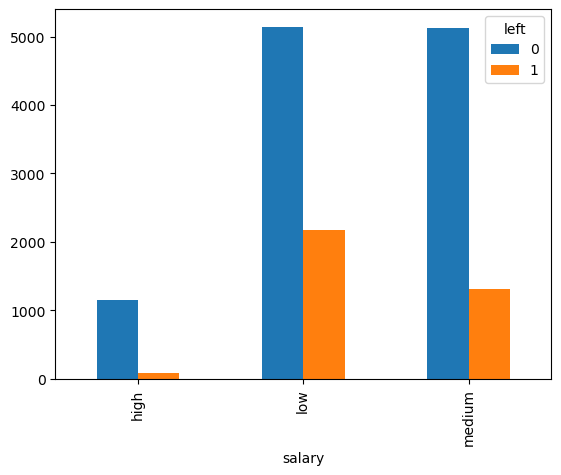

In [29]:
pd.crosstab(df.salary,df.left).plot(kind = 'bar')

<Axes: xlabel='Department'>

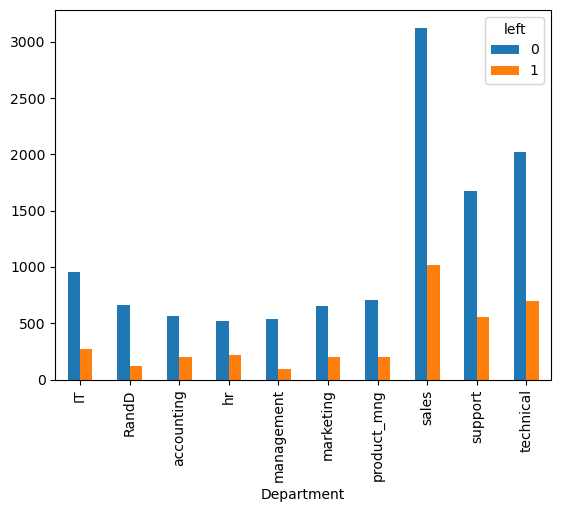

In [64]:
pd.crosstab(df.Department,df.left).plot(kind = 'bar')

In [33]:
# We can see from our correlation heatmap and charts that salary, satisfaction level, work accident, promotion_last_5_years

In [36]:
subdf = df[['satisfaction_level', 'Work_accident', 'promotion_last_5years', 'salary']]
subdf.head()

satisfaction_level  Work_accident  promotion_last_5years  salary
0                0.38              0                      0     low
1                0.80              0                      0  medium
2                0.11              0                      0  medium
3                0.72              0                      0     low
4                0.37              0                      0     low

In [43]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head(5)

satisfaction_level  Work_accident  promotion_last_5years  salary  \
0                0.38              0                      0     low   
1                0.80              0                      0  medium   
2                0.11              0                      0  medium   
3                0.72              0                      0     low   
4                0.37              0                      0     low   

   salary_high  salary_low  salary_medium  
0            0           1              0  
1            0           0              1  
2            0           0              1  
3            0           1              0  
4            0           1              0

In [44]:
df_with_dummies.drop('salary',axis='columns',inplace=True)

In [45]:
df_with_dummies.head()

satisfaction_level  Work_accident  promotion_last_5years  salary_high  \
0                0.38              0                      0            0   
1                0.80              0                      0            0   
2                0.11              0                      0            0   
3                0.72              0                      0            0   
4                0.37              0                      0            0   

   salary_low  salary_medium  
0           1              0  
1           0              1  
2           0              1  
3           1              0  
4           1              0

In [50]:
X = df_with_dummies
X.head(5)
y = df.left

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [54]:
model.fit(X_train, y_train)

LogisticRegression()

In [59]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])

In [62]:
model.score(X_test, y_test)

0.7706666666666667